## BT4211 Group 9 Hotel Project 

### Clean the data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz


In [2]:
df = pd.read_csv('HotelCustomersDataset_Cleaned.csv')
df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,...,0,0,0,0,0,1,0,0,0,0
1,2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,...,0,0,1,0,0,0,0,0,0,1
3,4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,...,0,0,1,0,0,0,0,0,1,0


In [3]:
df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,75397.000000,75397.000000,75397.00000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,...,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000
mean,41458.629853,41459.629853,47.43962,457.372482,69.406104,311.787922,70.174372,0.001950,0.000610,0.826638,...,0.136146,0.006525,0.826863,0.002958,0.005093,0.025147,0.131491,0.116583,0.573869,0.144860
std,23946.219003,23946.219003,14.63154,310.607758,88.717833,365.144705,112.928400,0.067813,0.029129,0.688431,...,0.342946,0.080517,0.378368,0.054304,0.071184,0.156572,0.337938,0.320925,0.494517,0.351962
min,0.000000,1.000000,18.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20943.000000,20944.000000,36.00000,184.000000,1.000000,91.200000,7.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40780.000000,40781.000000,48.00000,414.000000,34.000000,246.900000,42.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61799.000000,61800.000000,58.00000,722.000000,108.000000,415.000000,91.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,83588.000000,83589.000000,122.00000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Create RFM_df
RFM_df = df.assign(
    Recency=df['DaysSinceLastStay'], 
    Frequency=df['BookingsCheckedIn'], 
    Monetary=df['LodgingRevenue'] + df['OtherRevenue'])
RFM_df = RFM_df[['ID','Recency', 'Frequency', 'Monetary']]

# Only keep clients that had make a check-in in the past and is considered a client
RFM_df = RFM_df[
    (RFM_df['Recency'] > 0) & 
    (RFM_df['Frequency'] != 0) & 
    (RFM_df['Monetary'] != 0)
    ]
RFM_df.head()

,ID,Recency,Frequency,Monetary
0,1,151,3,476.3
2,4,1100,1,300.0
4,6,1097,1,254.0
6,8,1100,1,629.0
8,10,1098,1,243.0


## Remove outliers
Remove outliers based on Monetary value
Outliers are identified as those fall below the first quartile (Q1) minus 1.5 times the interquartile range (IQR) or above the third quartile (Q3) plus 1.5 times the IQR.  
IQR is difference between Q3 and Q1

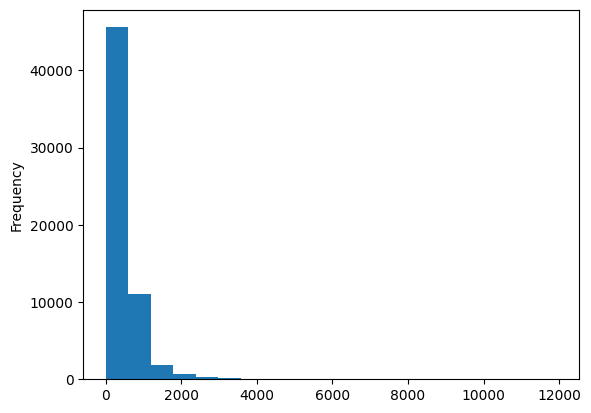

In [5]:
# Show skewed Mone
RFM_df['Monetary'].plot.hist(bins=20)
plt.show()

In [6]:
# Calculate the first and third quartiles and the interquartile range for the Monetary column
Q1 = RFM_df['Monetary'].quantile(0.25)
Q3 = RFM_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers from the Monetary column
RFM_df = RFM_df[(RFM_df['Monetary'] >= lower_bound) & (RFM_df['Monetary'] <= upper_bound)]


In [7]:
RFM_df.describe()

,ID,Recency,Frequency,Monetary
count,55803.000000,55803.000000,55803.000000,55803.000000
mean,36219.779403,524.210580,1.025518,400.500691
std,22814.718267,301.236759,0.358447,223.806071
min,1.000000,1.000000,1.000000,1.000000
25%,17513.500000,256.000000,1.000000,234.000000
50%,33008.000000,527.000000,1.000000,363.000000
75%,53077.500000,792.000000,1.000000,528.450000
max,83589.000000,1104.000000,57.000000,1085.500000


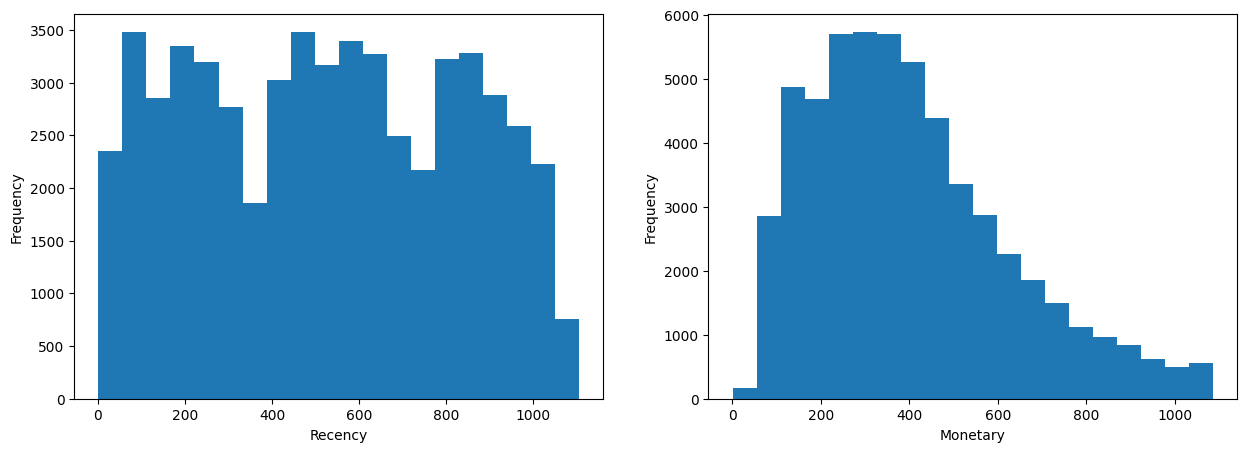

In [8]:
# Plot histograms of the Recency, Frequency, and Monetary values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
RFM_df['Recency'].plot.hist(bins=20, ax=axs[0])
axs[0].set_xlabel('Recency')
RFM_df['Monetary'].plot.hist(bins=20, ax=axs[1])
axs[1].set_xlabel('Monetary')
plt.show()

### Customer Segmentation

In [9]:
# Create a new column for the RFM score
RFM_df['RFM_Score'] = 0

# Define the quartiles for Recency and Monetary
recency_quartiles = pd.qcut(RFM_df['Recency'], 4, labels=[4, 3, 2, 1])
monetary_quartiles = pd.qcut(RFM_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Assign the quartile values to the RFM score column
RFM_df['RFM_Score'] = recency_quartiles.astype(int)*2 + monetary_quartiles.astype(int)

# Define the quartiles for the RFM score
RFM_quartiles = pd.qcut(RFM_df['RFM_Score'], 4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

# Assign the quartile values to a new column in the DataFrame
RFM_df['Segment'] = RFM_quartiles
RFM_df.head()


,ID,Recency,Frequency,Monetary,RFM_Score,Segment
0,1,151,3,476.3,11,Platinum
2,4,1100,1,300.0,4,Bronze
4,6,1097,1,254.0,4,Bronze
6,8,1100,1,629.0,6,Silver
8,10,1098,1,243.0,4,Bronze


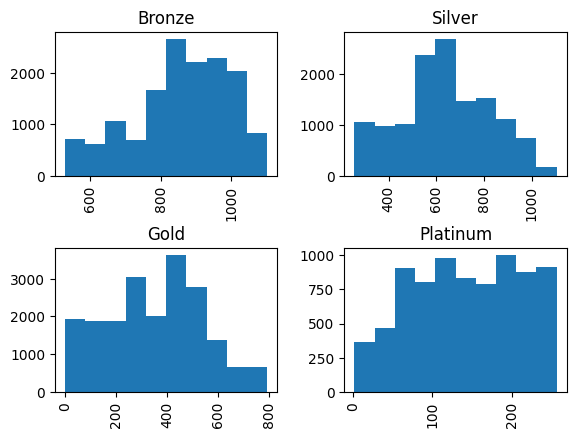

In [10]:
# Plot the histogram of Recency by Segment
RFM_df.hist('Recency', by='Segment', bins=10)

# Show the figure
plt.show()

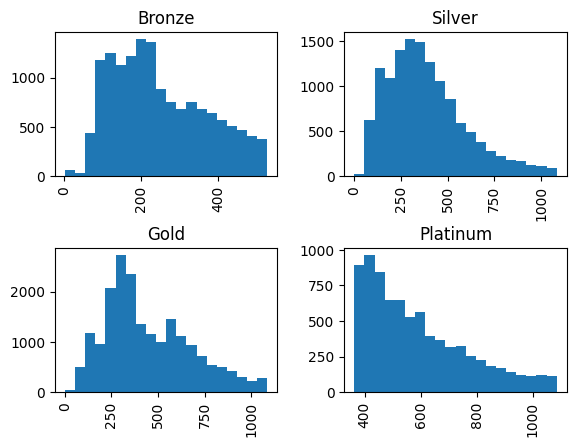

In [11]:
# Plot the histogram of Monetary by Segment
RFM_df.hist('Monetary', by='Segment', bins=20)

# Show the figure
plt.show()

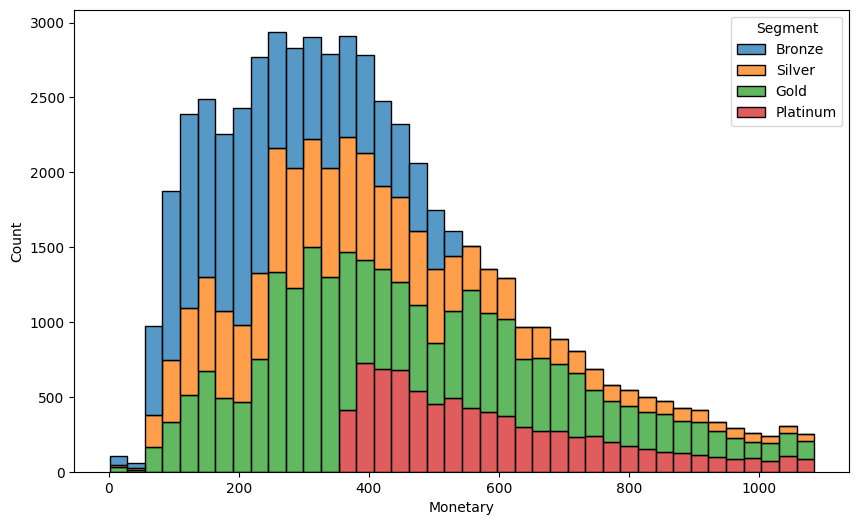

In [12]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the histograms for Monetary for four segments overlapping each other
sns.histplot(data=RFM_df, x='Monetary', hue='Segment', multiple='stack', bins=40)

# Show the figure
plt.show()

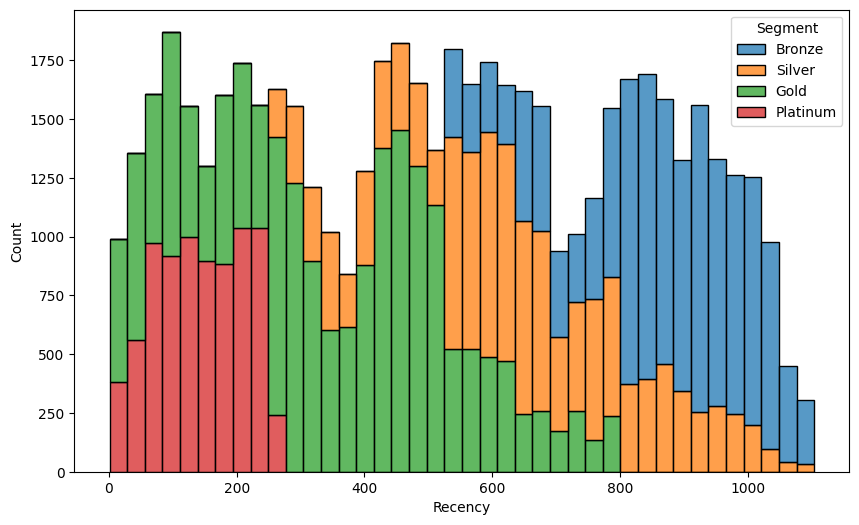

In [13]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the histograms for Recency for four segments overlapping each other
sns.histplot(data=RFM_df, x='Recency', hue='Segment', multiple='stack', bins=40)

# Show the figure
plt.show()

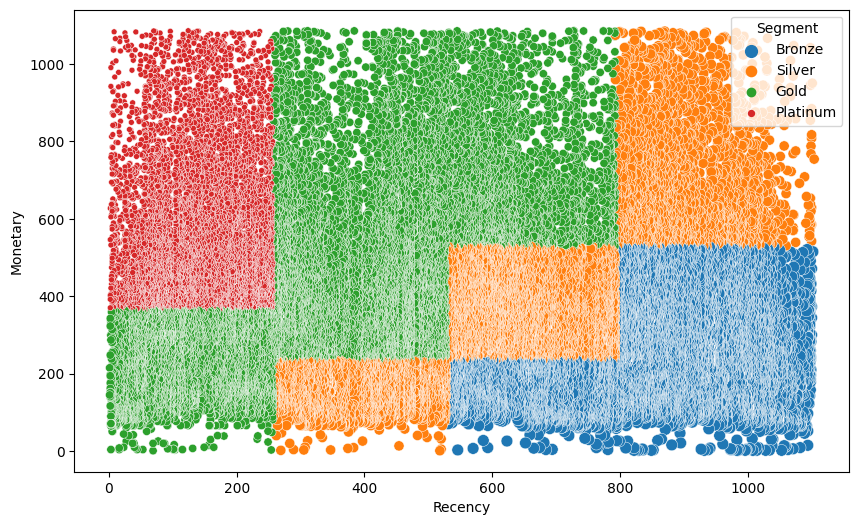

In [14]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the scatter plot for Recency and Monetary for four segments
sns.scatterplot(data=RFM_df, x='Recency', y='Monetary', hue='Segment', size='Segment')

# Show the figure
plt.show()

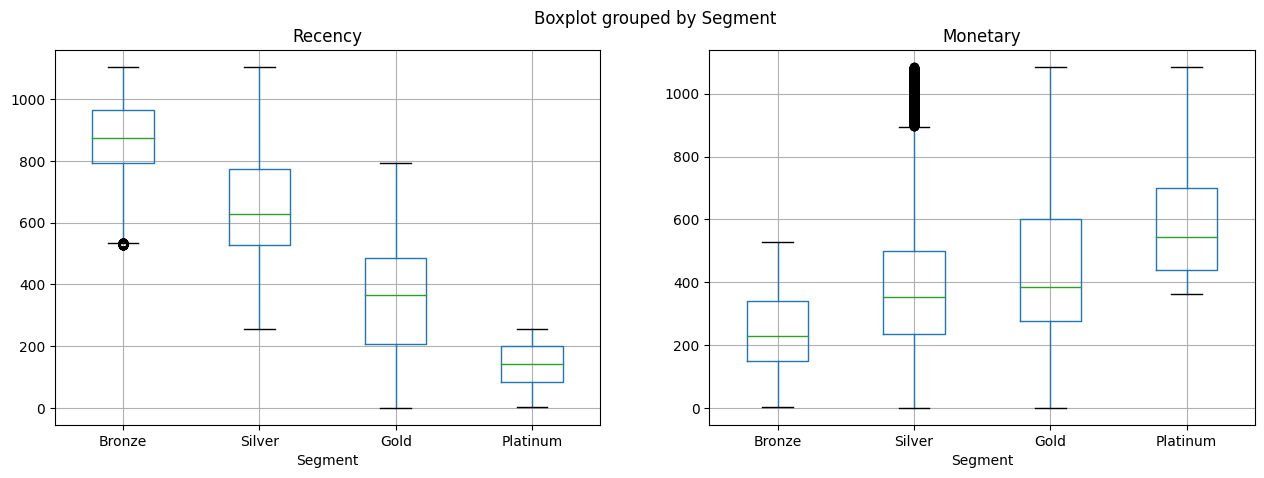

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the boxplot of Recency by Segment
RFM_df.boxplot('Recency', by='Segment', ax=axes[0])

# Plot the boxplot of Monetary by Segment
RFM_df.boxplot('Monetary', by='Segment', ax=axes[1])

# Show the figure
plt.show()

### Classification Model

In [16]:
# Join RFM_df and df based on ID column
segmented_df = pd.merge(RFM_df[['ID', 'Segment']], df, on='ID', how='inner')
segmented_df = segmented_df.loc[:, ~segmented_df.columns.str.contains('^Unnamed')]
segmented_df = segmented_df.drop(['NameHash', 'DocIDHash'], axis=1)
nationality_enconder = LabelEncoder()
segmented_df['Nationality'] = nationality_enconder.fit_transform(segmented_df['Nationality'])

# Show the joined dataframe
segmented_df.head()

,ID,Segment,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,Platinum,127,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,4,Bronze,54,60.0,1095,93,240.0,60.0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,6,Bronze,81,54.0,1095,58,230.0,24.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8,Silver,54,32.0,1095,38,535.0,94.0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,10,Bronze,72,25.0,1095,96,174.0,69.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
X = segmented_df.drop('Segment', axis=1)
y = segmented_df['Segment']
le = LabelEncoder()
y = le.fit_transform(y) # encode class labels into numeric values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a classifier
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)

# Prune the decision tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, max_depth=4)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Select the decision tree with the highest accuracy on the test set
acc_scores = [clf.score(X_test, y_test) for clf in clfs]
best_clf_index = acc_scores.index(max(acc_scores))
best_clf = clfs[best_clf_index]

# Test the classifier on the testing data
y_pred = best_clf.predict(X_test) 

# Evaluate the classifier performance
acc = accuracy_score(y_test, y_pred) # calculate accuracy
cm = confusion_matrix(y_test, y_pred) # calculate confusion matrix
cr = classification_report(y_test, y_pred) # generate classification report

print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
print(f'Classification report:\n {cr}')

Accuracy: 0.9443598243884956
Confusion matrix:
 [[2851    0    0  124]
 [   0 3786   63  169]
 [   0   45 1523    0]
 [ 126   94    0 2380]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2975
           1       0.96      0.94      0.95      4018
           2       0.96      0.97      0.97      1568
           3       0.89      0.92      0.90      2600

    accuracy                           0.94     11161
   macro avg       0.94      0.95      0.94     11161
weighted avg       0.94      0.94      0.94     11161



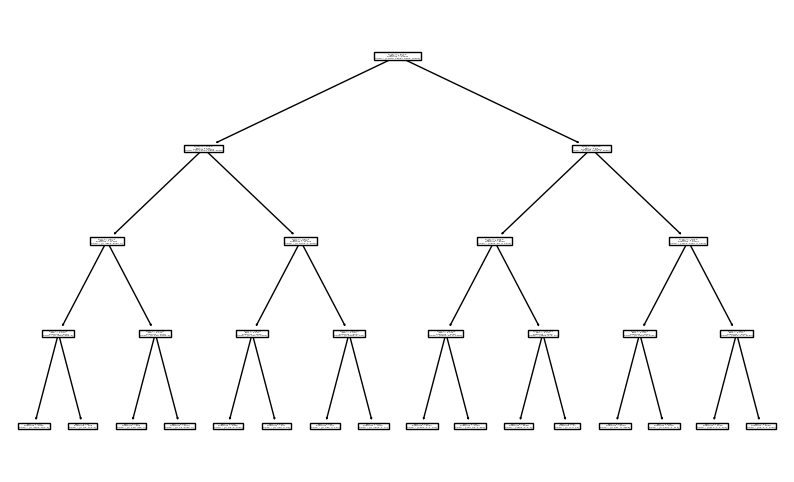

In [39]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the decision tree with feature names
plot_tree(best_clf)

# Show the figure
plt.show()

In [37]:
plt.savefig('tree.jpg')


<Figure size 640x480 with 0 Axes>